In [142]:
def Diagnostic_snp_finder(working_dir, population_pair): ## working dir = string, population_pair = tuple
    pop_1 = population_pair[0]
    pop_2 = population_pair[1]
    fsts = open(working_dir+"/batch_1.fst_"+pop_1+"-"+pop_2+".tsv", 'r').readlines()
    vcf = open(working_dir+"Ho_filtered_altered.vcf", 'r').readlines()
    
    for line in fsts[1:10]:
        if not line.startswith("#"):
            Loc_ID = line.split()[1]
            scaffold = line.split()[4]
            base = line.split()[5]
            fst = line.split()[8]
            
            print Loc_ID, scaffold, base, fst

In [143]:
Diagnostic_snp_finder("/media/dan/34D5D1CE642D7E36/2013076_Hanfling_Bernd/Stacks/Stacks_analyses_TRIMMED/With_reference/Data_links/pstacks_Pure_spp_only/Diagnostic_SNPs/AU_COMM_populations/", ("GOLD", "COMMON"))

17 ENA|LN590671|LN590671.1 266333 1.0000
17 ENA|LN590671|LN590671.1 266370 1.0000
17 ENA|LN590671|LN590671.1 266371 1.0000
17 ENA|LN590671|LN590671.1 266376 1.0000
17 ENA|LN590671|LN590671.1 266396 -0.0896
17 ENA|LN590671|LN590671.1 266410 1.0000
35 ENA|LN590671|LN590671.1 457982 -0.1761
13457 ENA|LN590671|LN590671.1 497236 1.0000
13457 ENA|LN590671|LN590671.1 497237 -0.0377


In [8]:
string = "batch_1.fst_HK-TROM.tsv"

pop1 = string.split("_")[2].split("-")[0]
pop2 = string.split("_")[2].split("-")[1].split(".")[0]

print pop1
print pop2


HK
TROM


In [20]:
## Function to find snps with Fst over 0.95 in each PW population file

def High_fst_finder(fst_file, blacklist):
    fsts = open(fst_file, 'r').readlines()
    blacklist = open(blacklist, 'r').readlines()
    blacklist = [i.strip() for i in blacklist]
    
    high_fsts = []
    diagnostic_snp_counter = 0
    for snp in fsts[1:]:
        snp_ID = snp.split("\t")[1]
        fst = float(snp.split("\t")[8])
        #print snp_ID
        #print fst
        if snp_ID not in blacklist and snp_ID not in high_fsts and fst == 1:
            high_fsts.append(snp_ID)
            diagnostic_snp_counter += 1
    #print "Number of Diagnostic snps between for", fst_file.rpartition("/")[-1], "=", diagnostic_snp_counter
    return high_fsts
    
    

In [101]:
from collections import Counter
print len(Counter(Cru_codes))

23


In [3]:
assignements = open("/media/dan/34D5D1CE642D7E36/2013076_Hanfling_Bernd/Stacks/Stacks_analyses_TRIMMED/With_reference/Data_links/pstacks_Pure_spp_only/treemix_unpooled_cru/Indiv_assignments.txt", 'r').readlines()

Cru_codes = []
Gib_codes = []
Gold_codes = []
Comm_codes = []

for line in assignements:
    line = line.strip()
    if line.split()[1] == "CRU":
        Cru_codes.append(line.split()[0])
    elif line.split()[1] == "GOLD":
        Gib_codes.append(line.split()[0])
    elif line.split()[1] == "GIB":
        Gold_codes.append(line.split()[0])
    elif line.split()[1] == "COMMON":
        Comm_codes.append(line.split()[0])
print Cru_codes
print Gib_codes
print Gold_codes
print Comm_codes


['BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BF', 'BOR', 'BOR', 'BOR', 'BOR', 'BOR', 'CAKE', 'CAKE', 'CAKE', 'CAKE', 'CAKE', 'CAKE', 'CAKE', 'CAKE', 'CAKE', 'CA-LK', 'CA-LK', 'CA-LK', 'CA-LK', 'CA-LK', 'CA-LK', 'CA-LK', 'CA-LK', 'CA-LK', 'CA-LK', 'COP', 'COP', 'COP', 'COP', 'COP', 'COP', 'COP', 'COP', 'COP', 'COP', 'EP', 'FM', 'FM', 'FM', 'FM', 'FM', 'HK', 'HK', 'HK', 'HKH', 'HKH', 'MOAT', 'MOAT', 'MOAT', 'MOAT', 'MOAT', 'MOAT', 'MOAT', 'MOAT', 'MOAT', 'MOAT', 'OBY', 'OBY', 'OBY', 'OBY', 'OBY', 'OBY', 'OBY', 'OBY', 'OBY', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'OU', 'PED', 'PED', 'PED', 'PED', 'PED', 'PED', 'PED', 'PED', 'POLEN', 'POLEN', 'POLEN', 'POLEN', 'POLEN', 'POLEN', 'POLEN', 'POLEN', 'POLEN', 'POLEN', 'PRO', 'PRO', 'PRO', 'PRO', 'PRO', 'PRO', 'PRO', 'PRO', 'PRO', 'RM', 'RM', 'RM', 'RM', 'RM', 'RM', 'RM', 'RM', 'RM', 'RM', 'SK', 'SK', 'SK', 'SK', 'SK', 'SK', 'SK', 'SK', 'SK', 'SK', 'STEC', 'STEC', 'STEC', 'STEC', 'STEC', 'STEC', 'STEC', 'STEC', 'STEC', 'STEC', 'STYV', 'S

In [21]:
import os
from collections import Counter


## First get the population codes for samples belonging to each species.

## This assignments file contains two columns, col1 is sample names, and col2 is their species assignment i.e. CRU, GOLD, GIB or COMMON in this case
assignements = open("/media/dan/34D5D1CE642D7E36/2013076_Hanfling_Bernd/Stacks/Stacks_analyses_TRIMMED/With_reference/Data_links/pstacks_Pure_spp_only/treemix_unpooled_cru/Indiv_assignments.txt", 'r').readlines()

Cru_codes = []
Gib_codes = []
Gold_codes = []
Comm_codes = []

for line in assignements:
    line = line.strip()
    if line.split()[1] == "CRU":
        Cru_codes.append(line.split()[0])
    elif line.split()[1] == "GOLD":
        Gib_codes.append(line.split()[0])
    elif line.split()[1] == "GIB":
        Gold_codes.append(line.split()[0])
    elif line.split()[1] == "COMMON":
        Comm_codes.append(line.split()[0])

CA_GI_diagnostic_snps = []
CA_AU_diagnostic_snps = []
CA_COMM_diagnostic_snps = []
GI_AU_diagnostic_snps = []
GI_COMM_diagnostic_snps = []
AU_COMM_diagnostic_snps = []

blacklist = "/media/dan/34D5D1CE642D7E36/2013076_Hanfling_Bernd/Stacks/Stacks_analyses_TRIMMED/With_reference/Data_links/pstacks_Pure_spp_only/treemix_unpooled_cru/populations_no_SD_p26_r07/blacklist.txt"

## Now loop over all the pairwise FST files in the stacks outputs, and find loci that have 0.95 fsts between populations (species)

for root, dirs, files in os.walk("/media/dan/34D5D1CE642D7E36/2013076_Hanfling_Bernd/Stacks/Stacks_analyses_TRIMMED/With_reference/Data_links/pstacks_Pure_spp_only/treemix_unpooled_cru/populations_no_SD_p26_r07/"):
    for File in files:
        if File.startswith("batch_1.fst_") and "summary" not in File:
            pop1 = File.split("_")[2].split("-")[0]
            pop2 = File.split("_")[2].split("-")[1].split(".")[0]
            
            
            if pop1 in Cru_codes and pop2 in Gib_codes: 
                CA_GI_diagnostic_snps.append(High_fst_finder(root+File, blacklist))
            if pop2 in Cru_codes and  pop1 in Gib_codes:
                CA_GI_diagnostic_snps.append(High_fst_finder(root+File, blacklist))
            if pop1 in Cru_codes and pop2 in Gold_codes or pop2 in Cru_codes and pop1 in Gold_codes: 
                CA_AU_diagnostic_snps.append(High_fst_finder(root+File, blacklist))
            if pop1 in Cru_codes and pop2 in Comm_codes or pop2 in Cru_codes and pop1 in Comm_codes: 
                CA_COMM_diagnostic_snps.append(High_fst_finder(root+File, blacklist))
            if pop1 in Gib_codes and pop2 in Gold_codes or pop2 in Gib_codes and pop1 in Gold_codes: 
                GI_AU_diagnostic_snps.append(High_fst_finder(root+File, blacklist))
            if pop1 in Gib_codes and pop2 in Comm_codes or pop2 in Gib_codes and pop1 in Comm_codes: 
                GI_COMM_diagnostic_snps.append(High_fst_finder(root+File, blacklist))
            if pop1 in Gold_codes and pop2 in Comm_codes or pop2 in Gold_codes and pop1 in Comm_codes: 
                AU_COMM_diagnostic_snps.append(High_fst_finder(root+File, blacklist))
                        
## These lists will now contain lists of stacks ID's from each file
## to flatten these lists do this:
CA_GI_diagnostic_snps = [snp for sublist in CA_GI_diagnostic_snps for snp in sublist]
CA_AU_diagnostic_snps = [snp for sublist in CA_AU_diagnostic_snps for snp in sublist]
CA_COMM_diagnostic_snps = [snp for sublist in CA_COMM_diagnostic_snps for snp in sublist]
GI_AU_diagnostic_snps = [snp for sublist in GI_AU_diagnostic_snps for snp in sublist]
GI_COMM_diagnostic_snps = [snp for sublist in GI_COMM_diagnostic_snps for snp in sublist]
AU_COMM_diagnostic_snps = [snp for sublist in AU_COMM_diagnostic_snps for snp in sublist]                                              

                                               
## Each list will contain one copy of each stacks ID for each file that it comes up in. For the gold, gib and common
## combinations, this will just be one, for any combo with crucian in, this will be more.
                                               
# There are 23 crucian populations here. So can filter these lists for loci that come up in a certain number of these 23:

CA_GI_counted = Counter(CA_GI_diagnostic_snps) ## These are dictionaries with format {Stacks_ID:count}
CA_AU_counted = Counter(CA_AU_diagnostic_snps)
CA_COMM_counted = Counter(CA_COMM_diagnostic_snps)

# for the Crucian populations - filter the ones diagnostic in all crucian populations

CA_GI_super_diagnostic = []
CA_AU_super_diagnostic = []
CA_COMM_super_diagnostic = []

for item in CA_GI_counted.iteritems():
    if item[1] >= 22:
        CA_GI_super_diagnostic.append(item[0])
CA_AU_super_diagnostic = []
for item in CA_AU_counted.iteritems():
    if item[1] >= 22:
        CA_AU_super_diagnostic.append(item[0])
CA_COMM_super_diagnostic = []
for item in CA_COMM_counted.iteritems():
    if item[1] >= 22:
        CA_COMM_super_diagnostic.append(item[0])
    



print "Number of CA_GI diagnostic markers", len(CA_GI_super_diagnostic)
print "Number of CA_AU diagnostic markers", len(CA_AU_super_diagnostic)
print "Number of CA_COMM diagnostic markers", len(CA_COMM_super_diagnostic)
print "Number of GI_AU diagnostic markers", len(GI_AU_diagnostic_snps)
print "Number of GI_COMM diagnostic markers", len(GI_COMM_diagnostic_snps)
print "Number of AU_COMM diagnostic markers", len(AU_COMM_diagnostic_snps)




Number of CA_GI diagnostic markers 1992
Number of CA_AU diagnostic markers 1964
Number of CA_COMM diagnostic markers 2836
Number of GI_AU diagnostic markers 0
Number of GI_COMM diagnostic markers 2769
Number of AU_COMM diagnostic markers 2756


In [22]:
## Now make filtered vcfs containing these diagnostic loci and you're done! 

orig_vcf = open("/media/dan/34D5D1CE642D7E36/2013076_Hanfling_Bernd/Stacks/Stacks_analyses_TRIMMED/With_reference/Data_links/pstacks_Pure_spp_only/treemix_unpooled_cru/populations_no_SD_p26_r07/Ho_filtered_altered.vcf", 'r').readlines()

## CRU_AU ## 

CRU_AU_VCF = open("/media/dan/34D5D1CE642D7E36/2013076_Hanfling_Bernd/Stacks/Stacks_analyses_TRIMMED/With_reference/Data_links/pstacks_Pure_spp_only/treemix_unpooled_cru/Species_diagnostic_snps/CRU_AU.vcf", 'w')
for line in orig_vcf:
    if line.startswith("#") or line.split()[2] in CA_AU_super_diagnostic:
        CRU_AU_VCF.write(line)
CRU_AU_VCF.close()

## AU_COMM ## 

AU_COMM_VCF = open("/media/dan/34D5D1CE642D7E36/2013076_Hanfling_Bernd/Stacks/Stacks_analyses_TRIMMED/With_reference/Data_links/pstacks_Pure_spp_only/treemix_unpooled_cru/Species_diagnostic_snps/AU_COMM.vcf", 'w')
for line in orig_vcf:
    if line.startswith("#") or line.split()[2] in AU_COMM_diagnostic_snps:
        AU_COMM_VCF.write(line)
AU_COMM_VCF.close()



In [18]:
%load_ext rmagic

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic



 Reading PLINK raw format into a genlight object... 


 Reading loci information... 

 Reading and converting genotypes... 
.
 Building final object... 

...done.



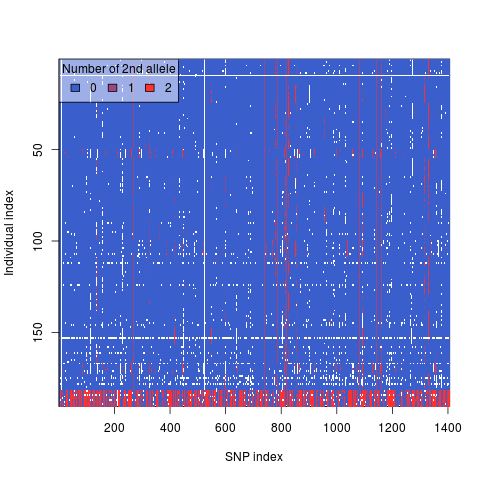

In [25]:


%R library(adegenet)

%R CRU_AU <- read.PLINK("/media/dan/34D5D1CE642D7E36/2013076_Hanfling_Bernd/Stacks/Stacks_analyses_TRIMMED/With_reference/Data_links/pstacks_Pure_spp_only/Diagnostic_SNPs/CRU_AU_populations/All_diag_snps_plink_no_SD.raw", chunkSize=1000, parallel = TRUE, n.cores=3, saveNbAlleles=T)
%R glPlot(CRU_AU, posi="topleft", yaxt = 'n')
